In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

import warnings

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#dimension of the data
data.shape

(30, 2)

In [4]:
#missing values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
# this describes the basic stat behind the dataset used
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Q-Q plot of Salary')

<Figure size 432x288 with 0 Axes>

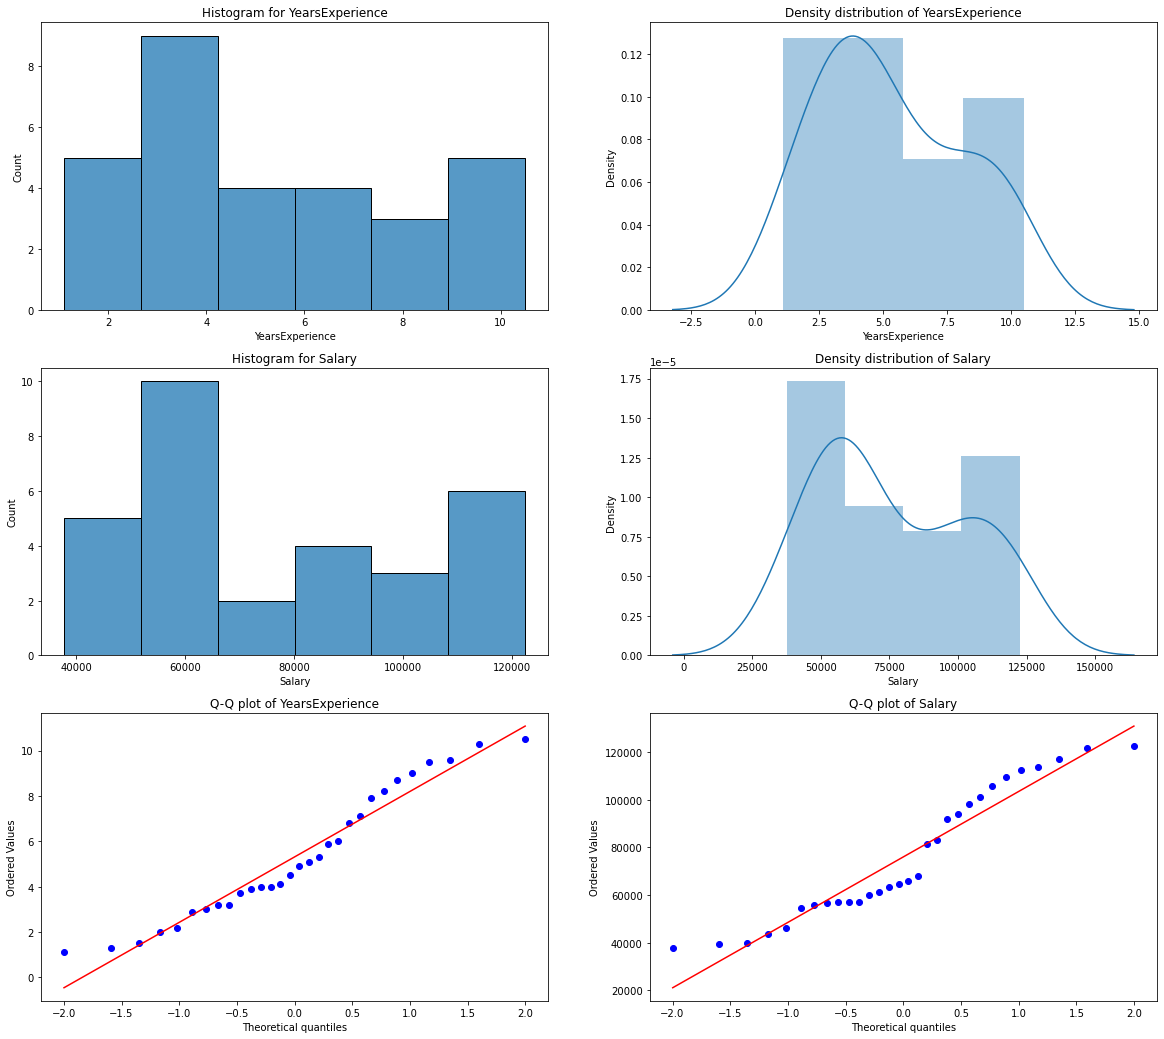

In [7]:
# checking if the variables ars normally distributed or not

warnings.filterwarnings("ignore")

plt.suptitle("Fig1", y=1.05, fontsize=10)
plt.figure(figsize= (20,18))

plt.subplot(3,2,1)
sns.histplot(data=data, x="YearsExperience")
plt.title("Histogram for YearsExperience")

plt.subplot(3,2,2)
sns.distplot(data['YearsExperience'], kde=True)
plt.title("Density distribution of YearsExperience")

plt.subplot(3,2,3)
sns.histplot(data=data, x="Salary")
plt.title("Histogram for Salary")

plt.subplot(3,2,4)
sns.distplot(data['Salary'], kde=True)
plt.title("Density distribution of Salary")

plt.subplot(3,2,5)
probplot(data['YearsExperience'], plot=plt)
plt.title("Q-Q plot of YearsExperience")

plt.subplot(3,2,6)
probplot(data['Salary'], plot=plt)
plt.title("Q-Q plot of Salary")

In [8]:
shapiro_test1 = stats.shapiro(data['Salary'])
print("For Salary: ", shapiro_test1)

print()

shapiro_test2 = stats.shapiro(data['YearsExperience'])
print("For YearsExperience: ", shapiro_test2)

For Salary:  ShapiroResult(statistic=0.9103153944015503, pvalue=0.015155534259974957)

For YearsExperience:  ShapiroResult(statistic=0.9420627355575562, pvalue=0.10337740182876587)


In [9]:
#correlation
M = data.corr()
M

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0.5, 1.0, 'Scatter Plot')

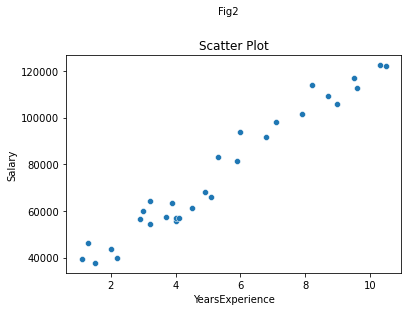

In [10]:
sns.scatterplot(data=data, x="YearsExperience", y="Salary")
plt.suptitle("Fig2", y=1.05, fontsize=10)
plt.title("Scatter Plot")

Text(0.5, 1.05, 'Fig3')

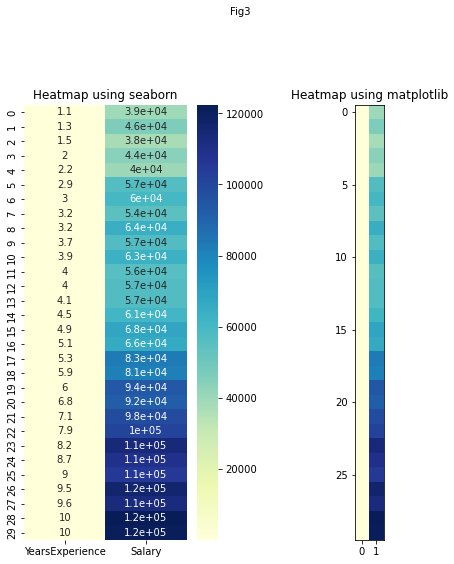

In [11]:
# heatmap
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
sns.heatmap(data=data, cmap="YlGnBu", annot = True)
plt.title("Heatmap using seaborn")

plt.subplot(1, 2, 2)
plt.imshow(data, cmap ="YlGnBu")
plt.title("Heatmap using matplotlib")

plt.suptitle("Fig3", y=1.05, fontsize=10)

In [12]:
# setting the dependent and independent variables
X = data['YearsExperience']
y = data['Salary']

In [13]:
X = sm.add_constant(X) # adding a constant

m1 = sm.OLS(y, X).fit()


print("SIMPLE LINEAR REGRESSION MODEL: \n")
print_model = m1.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL: 

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.14e-20
Time:                        13:32:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const   

In [14]:
ypred = m1.predict(X) 
print(ypred)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64


In [15]:
data['Predicted'] = round(ypred,3)
data.head()

,YearsExperience,Salary,Predicted
0,1.1,39343.0,36187.159
1,1.3,46205.0,38077.151
2,1.5,37731.0,39967.144
3,2.0,43525.0,44692.125
4,2.2,39891.0,46582.117


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [17]:
m1 = LinearRegression()
m1.fit(X_train, y_train)

LinearRegression()

In [18]:
print("beta_0 =",m1.intercept_)
print("slopes  = ",m1.coef_.round(2),"\n")

beta_0 = 26562.399292606962
slopes  =  [   0.   9377.72] 



In [28]:
y_pred = m1.predict(X)

In [29]:
data["Predicted_"] = y_pred
data.head()

,YearsExperience,Salary,Predicted,Predicted_
0,1.1,39343.0,36187.159,36877.886686
1,1.3,46205.0,38077.151,38753.429849
2,1.5,37731.0,39967.144,40628.973011
3,2.0,43525.0,44692.125,45317.830918
4,2.2,39891.0,46582.117,47193.374080


In [30]:
print("R2 =",(m1.score(X_train, y_train)))

R2 = 0.9510574723018146


### CONCLUSION

* A Simple Linear Regression (SLR), we will have a single input variable based on which we predict the output variable. $$Y = \beta_0 + \beta_1(X1) +\epsilon $$ where Y is the dependent variable, X is the predictor, βo, β1 are coefficients/parameters of the model, and Epsilon(ϵ) is a random variable called Error Term.


* The dataset used for fitting a SLR is Salary Dataset. The dataset consists of 30 observations and just 2 columns (ie) YearExperience and Salary. Also the dataset has no null-values. 


* __Objective:__ A simple linear regression model to predict the Salary Hike using Years of Experience.


* __Understanding the Dataset:__

    1. Using the describe(), we get to know the maximum and minimum Years of Experience is 1.1 and 10.5 years respectively. The minimum salary offered to the employee is 76003.00 and maximum salary offered is 122391.00
    
    2. From the above graphical representations, we can say there are no outliers in our data, and YearsExperience looks like normally distributed, and Salary doesn't look normal. To check if we are right we have also performed the shapiro wilk test. 
  $$ H_0: \text{The Salary variable is normally distributed}$$
  $$ H_1: \text{The Salary variable is not normally distributed}$$
  $$ H_0: \text{The Years of Experience variable is normally distributed}$$
  $$ H_0: \text{The Years of Experience variable is not normally distributed}$$
  Clearly the p-value for Years of experience > 0.05 thus we accept $H_0$ (ie) The Years of Experience variable is normally distributed. But Salary is not normally distibuted as p-value < 0.05, hence reject $H_0$
  
  3.  We check how these two variables are associated (ie) Correlation. We see that there is a very strong positive correlation between Years of Experience and salary. From heatmap also we see that as the years of experience increases, the salary received by the employee is high.
  
  
* For any regression model, there are two types of variables that are important. One is called dependent variable (ie) variable for which value is predicted and other is called independent variable (ie) the variable that influences the dependent variable. In our dataset the dependent varibale (Y) is Salary and independent variable is YearsExperience. 
  

* __Regression Model using statsmodels:__
  
     1. We obtain the regression equation :- $$\text{Salary (Y)} =  25790.0 + 9449.9623 *[\text{YearExperience(X)}]$$
     
     2. The value of $\beta_0 = 25790$ which means the salary is 25790 when years of experience is 0 years. The value of $\beta_1 = 9449.9623$ which means as the years of experience increases by 1 year the salary also increases by 9449.9623 amount.
     
     3. The value of $R^2 = 0.957$ which means that 95.7% of the information is explained by the variable meantioned in the data (ie) Years of Experience while the remaining is dependent on those variables that are not in the dataset.


* __Regression Model using sklearn:__

     1. We obtain the regression equation :- $$\text{Salary (Y)} =  26562.3992 + 9377.72 *[\text{YearExperience(X)}]$$
     
     2. The value of $\beta_0 = 26562.3992$ which means the salary is 25790 when years of experience is 0 years. The value of $\beta_1 = 9449.9623$ which means as the years of experience increases by 1 year the salary also increases by 9377.72 amount.
     
     3. The value of $R^2 = 0.951057$ which means that 95.105% of the information is explained by the variable meantioned in the data (ie) Years of Experience while the remaining is dependent on those variables that are not in the dataset.

---